Importando o material necessário para realizar o trabalho

In [214]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, Sequential
import seaborn as sns
from skimage.transform import resize
from PIL import Image
from math import floor
from sklearn.metrics import precision_recall_curve, roc_curve


Questão 1

In [215]:
#Guardando o dataset labeled faces in the wild em "dataset"

dataset = fetch_lfw_people(min_faces_per_person=70)

Questão 2

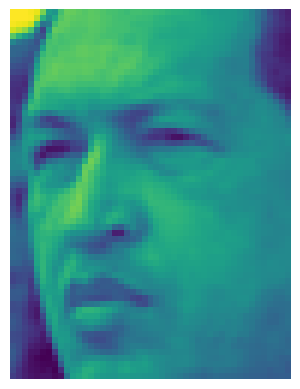

In [216]:
#convertendo as imagens do dataset (dataset.data) para escala de cinza usando PIL da biblioteca Image.

#separa o dataset em X (imagens) e rótulos (y)
X = dataset.data
y = dataset.target

image = X[0].reshape(dataset.images.shape[1:])

#plot antes de transformar para escala de cinza
plt.imshow(image)
plt.axis('off')
plt.show()

In [217]:
#ja que o array que representa as imagens só tem uma dimensão (ja esta vetorizado) e os valors do vetor ja estao normalizados (entre 0 e 1), nao precisa fazer nada

X.shape

(1288, 2914)

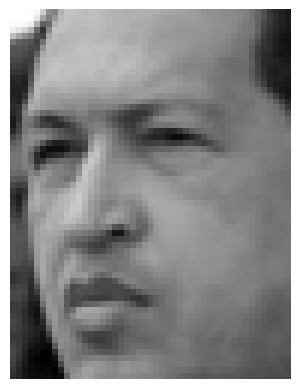

In [218]:
# Exemplo de visualização de uma imagem em escala de cinza

image = X[0].reshape(dataset.images.shape[1:])
plt.imshow(image, 'gray')
plt.axis('off')
plt.show()

Questão 3

In [219]:
#separando a base em treino e teste (80 20) usando train_test_split do sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Questão 4

In [220]:
#definindo a função build que criará a rede neural com as especificações pedidas

def build(v_shape):
    model = Sequential()
    model.add(layers.Dense(2914, activation='leaky_relu', input_shape=(v_shape,)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(7, activation='softmax'))

    model.summary()
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

modelo = build(X_train.shape[1])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 2914)              8494310   
                                                                 
 dense_67 (Dense)            (None, 256)               746240    
                                                                 
 dense_68 (Dense)            (None, 128)               32896     
                                                                 
 dense_69 (Dense)            (None, 7)                 903       
                                                                 
Total params: 9,274,349
Trainable params: 9,274,349
Non-trainable params: 0
_________________________________________________________________


In [221]:
#definindo, aqui, as regras para early stopping com as especificações pedidas
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#transformando a base de rótulos to_categorical (vetor de 7 posições, uma para cada categoria)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#ajustando o modelo
history = modelo.fit(X_train, y_train, epochs=1000,
                    validation_split=0.2, callbacks=[callback])

Epoch 1/1000
26/26 [==============================] - 8s 279ms/step - loss: 4.5170 - accuracy: 0.2706 - val_loss: 1.6872 - val_accuracy: 0.4029
Epoch 2/1000
26/26 [==============================] - 9s 363ms/step - loss: 1.8472 - accuracy: 0.3434 - val_loss: 1.6748 - val_accuracy: 0.4029
Epoch 3/1000
26/26 [==============================] - 10s 384ms/step - loss: 1.7467 - accuracy: 0.3726 - val_loss: 1.7218 - val_accuracy: 0.4078
Epoch 4/1000
26/26 [==============================] - 8s 315ms/step - loss: 1.6024 - accuracy: 0.4393 - val_loss: 1.4180 - val_accuracy: 0.4806
Epoch 5/1000
26/26 [==============================] - 9s 334ms/step - loss: 1.4923 - accuracy: 0.4806 - val_loss: 1.4162 - val_accuracy: 0.5340
Epoch 6/1000
26/26 [==============================] - 5s 174ms/step - loss: 1.4351 - accuracy: 0.4842 - val_loss: 1.3325 - val_accuracy: 0.5777
Epoch 7/1000
26/26 [==============================] - 5s 211ms/step - loss: 1.2854 - accuracy: 0.5316 - val_loss: 1.3615 - val_accuracy

Questão 5

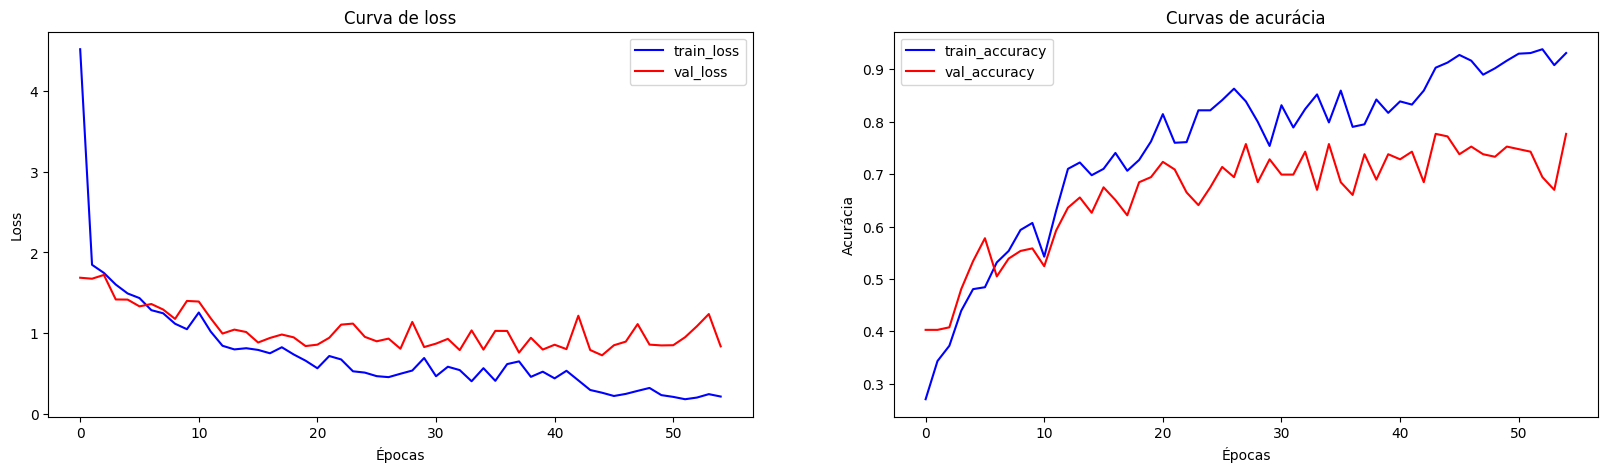

In [222]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

#curvas de loss
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(loss, 'b', label='train_loss')
plt.plot(val_loss, 'r', label='val_loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Curva de loss')
plt.legend()

#curvas de accuracy
plt.subplot(1,2,2)
plt.plot(accuracy, 'b', label='train_accuracy')
plt.plot(val_accuracy, 'r', label='val_accuracy')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Curvas de acurácia')
plt.legend()

plt.show()


Questão 6

In [223]:
#predict na base de teste usando o modelo treinado
pred_prob = modelo.predict(X_test)
X_test.shape

9/9 [==============================] - 0s 21ms/step


(258, 2914)

Questão 7

In [224]:
#np.argmax retorna o índice de maior probabilidade de cada um dos vetores to_categorical
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(pred_prob, axis=1)

# calculando a matriz de confusão
cm = confusion_matrix(y_true_labels, y_pred_labels)
print(cm)

[[ 8  0  3  0  0  0  0]
 [ 0 44  0  2  0  0  1]
 [ 1  2 16  3  0  0  0]
 [ 2  5  4 98  1  0  9]
 [ 1  0  0  0 11  0  7]
 [ 0  1  0  0  1  6  5]
 [ 1  1  0  1  2  0 22]]


<Axes: >

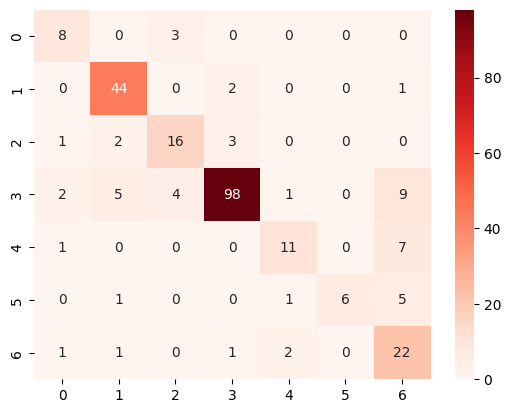

In [225]:
#plotando a matriz de confusão com o heatmap da bilbioteca seaborn

sns.heatmap(cm, annot=True, cmap = 'Reds', fmt = 'd')

Questão 8

In [226]:
#usando a função classification_report do sklearn.metrics
report = classification_report(y_true_labels, y_pred_labels)

print(report)

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.83      0.94      0.88        47
           2       0.70      0.73      0.71        22
           3       0.94      0.82      0.88       119
           4       0.73      0.58      0.65        19
           5       1.00      0.46      0.63        13
           6       0.50      0.81      0.62        27

    accuracy                           0.79       258
   macro avg       0.76      0.72      0.72       258
weighted avg       0.83      0.79      0.80       258



Questão 9

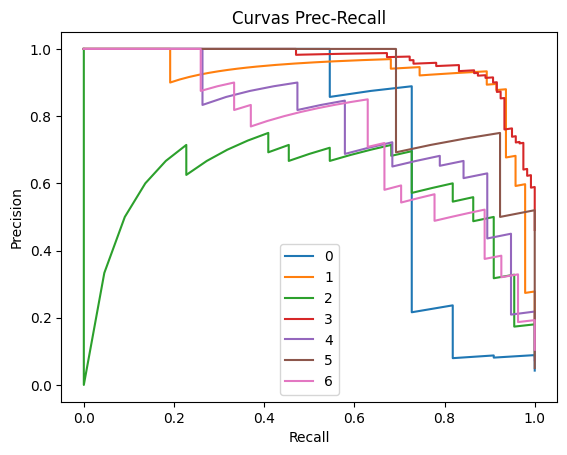

In [227]:
#plotando as curvas prec-recall, uma para cada classe.
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test[:, i], pred_prob[:, i])
    plt.plot(recall, precision, label=str(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("Curvas Prec-Recall")
plt.show()

Questão 10

In [228]:
#carregando a imagem baixada e convertendo para escala de cinza
imagem = Image.open("./george-w-bush-em-palanque-para-fazer-discurso.jpg")
imagem = imagem.convert("L")

Questão 11, 12 e 13

h
w


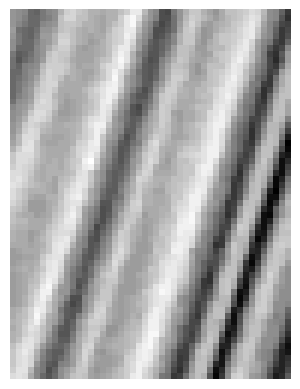

1/1 [==============================] - 0s 76ms/step
Que rosto?  0.60749185 1
w


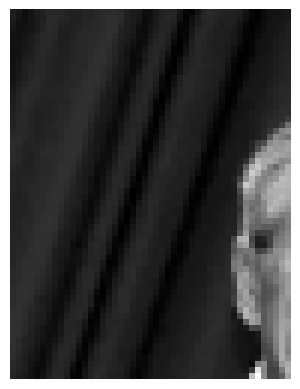

1/1 [==============================] - 0s 43ms/step
Que rosto?  0.46822104 1
w


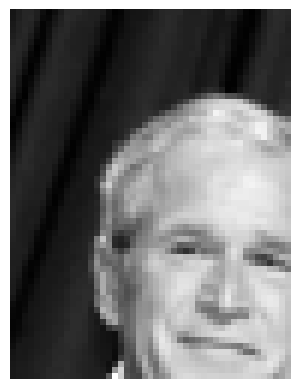

1/1 [==============================] - 0s 65ms/step
Que rosto?  0.8076481 5
w


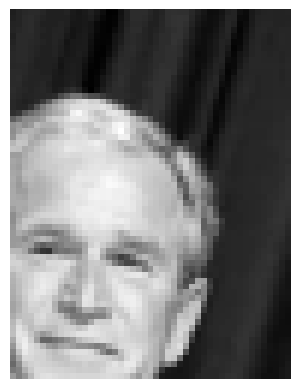

1/1 [==============================] - 0s 54ms/step
Que rosto?  0.98429453 3
w


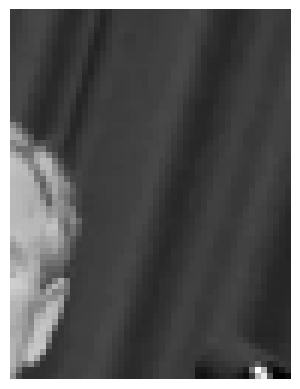

1/1 [==============================] - 0s 42ms/step
Que rosto?  0.68059343 3
w


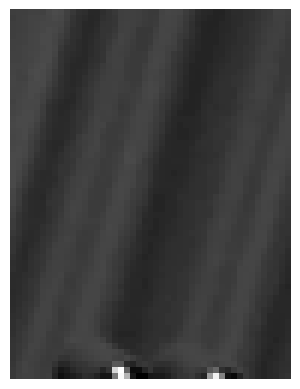

1/1 [==============================] - 0s 64ms/step
Que rosto?  0.317064 1
w


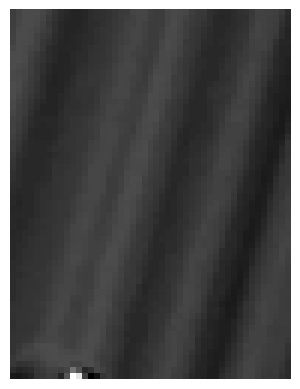

1/1 [==============================] - 0s 83ms/step
Que rosto?  0.34512466 2
w


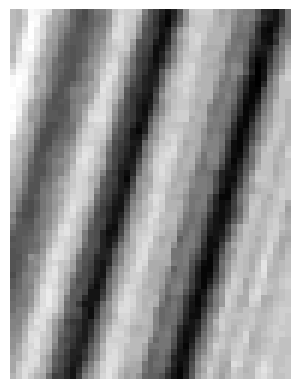

1/1 [==============================] - 0s 49ms/step
Que rosto?  0.8344034 1
h
w


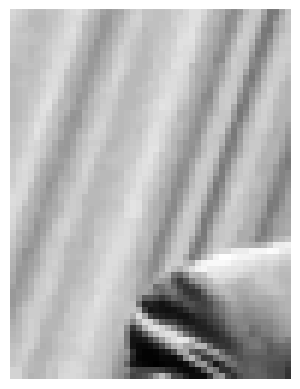

1/1 [==============================] - 0s 46ms/step
Que rosto?  0.7820911 1
w


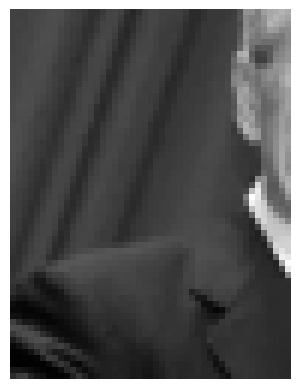

1/1 [==============================] - 0s 43ms/step
Que rosto?  0.96522254 1
w


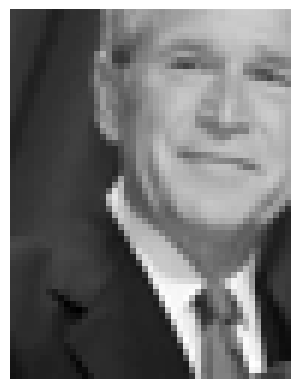

1/1 [==============================] - 0s 44ms/step
Que rosto?  0.9849095 1
w


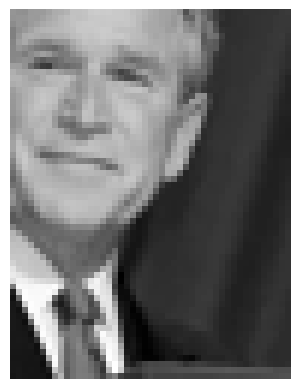

1/1 [==============================] - 0s 41ms/step
Que rosto?  0.60408247 1
w


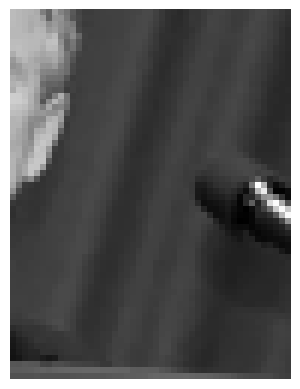

1/1 [==============================] - 0s 40ms/step
Que rosto?  0.8754284 1
w


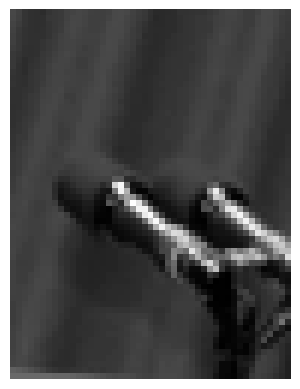

1/1 [==============================] - 0s 49ms/step
Que rosto?  0.5763925 1
w


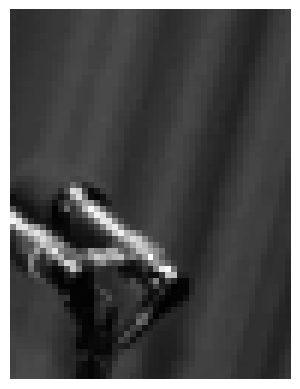

1/1 [==============================] - 0s 39ms/step
Que rosto?  0.8181677 1
w


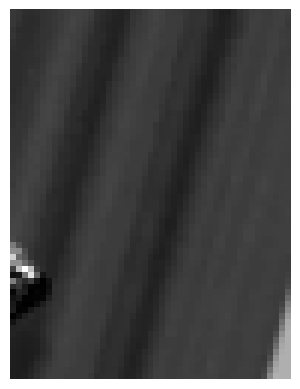

1/1 [==============================] - 0s 53ms/step
Que rosto?  0.43878466 3
h
w


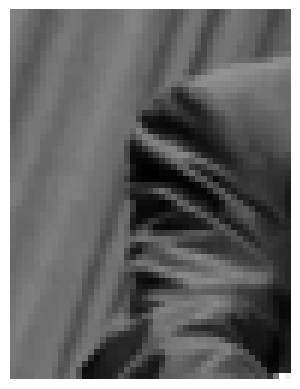

1/1 [==============================] - 0s 41ms/step
Que rosto?  0.38134837 0
w


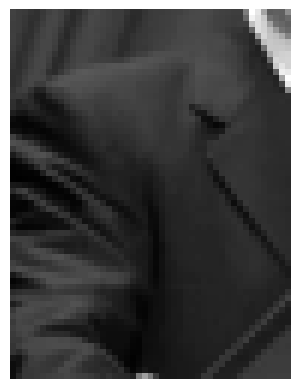

1/1 [==============================] - 0s 37ms/step
Que rosto?  0.80940783 1
w


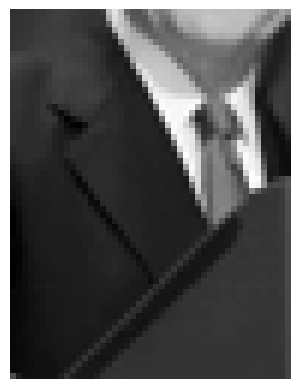

1/1 [==============================] - 0s 55ms/step
Que rosto?  0.87730986 1
w


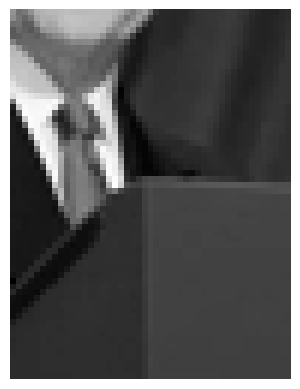

1/1 [==============================] - 0s 44ms/step
Que rosto?  0.48788077 2
w


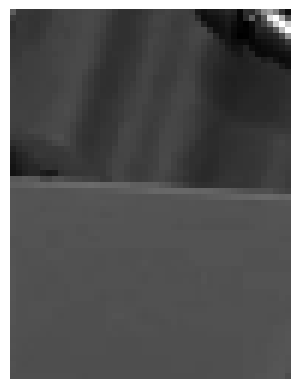

1/1 [==============================] - 0s 39ms/step
Que rosto?  0.7694775 3
w


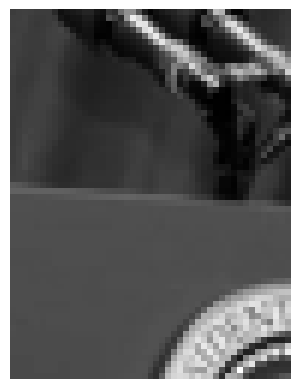

1/1 [==============================] - 0s 36ms/step
Que rosto?  0.9693787 3
w


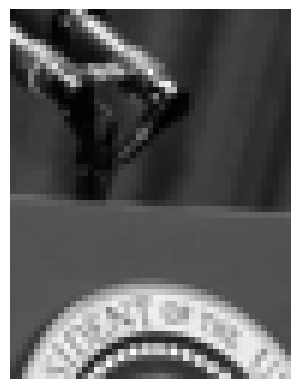

1/1 [==============================] - 0s 38ms/step
Que rosto?  0.90409523 2
w


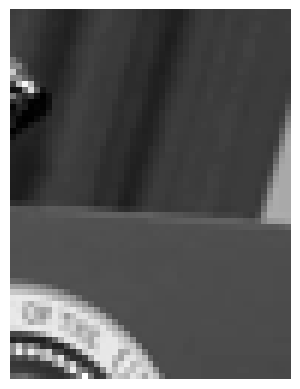

1/1 [==============================] - 0s 43ms/step
Que rosto?  0.978463 3


In [235]:
#algoritmo de janela deslizante
width, height = imagem.size

stepw, steph = (130/2, 170/2) #definindo cada passo da janela deslizante no eixo x (stepw) e no eixo y (steph), garantindo que haja 50% de sobreposição

best_prob = 0

h = 0
for i in range(floor(height/steph) - 1): #primeiro, percorre a largura para depois percorrer a altura
  w = 0
  print('h')
  for j in range(floor(width/stepw) - 1):
    print('w')
    cropped_image = imagem.crop((w, h, w + 130, h + 170))
    cropped_image = cropped_image.resize((47,62))
    #normaliza e vetoriza a imagem para poder entrar na rede

    vec_image = np.array(cropped_image)
    vec_image = vec_image.reshape(1, 62*47)/255 #imagem pronta

    image = vec_image.reshape(dataset.images.shape[1:])

    #plot antes de transformar para escala de cinza
    plt.imshow(image, "gray")
    plt.axis('off')
    plt.show()

    pred = modelo.predict(vec_image)
    amax_pred = np.amax(pred)
    print("Que rosto? ",amax_pred, np.argmax(pred))

    if((amax_pred > best_prob) and (np.argmax(pred) == 3)): #na base, 3 é o Bush
      best_im = vec_image
      best_prob = amax_pred
      who = np.argmax(pred)

    w = w + stepw

  h = h + steph

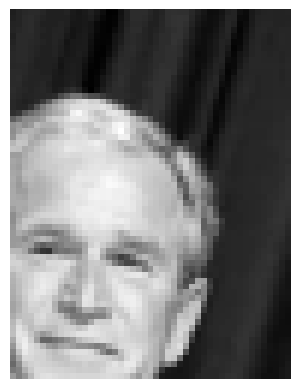

Probabilidade: 0.98429453 quem:  3


In [236]:
image = best_im.reshape(dataset.images.shape[1:])

plt.imshow(image, "gray")
plt.axis('off')
plt.show()

print("Probabilidade:", best_prob, "quem: ", who)